In [1]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
train=pd.read_csv('train_IxoE5JN.csv',index_col='datetime')
test=pd.read_csv('test_WudNWDM.csv',index_col='datetime')

In [89]:
train.head()

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


In [90]:
test.head()

,row_id
datetime,
2019-01-01 00:00:00,94993
2019-01-01 01:00:00,94994
2019-01-01 02:00:00,94995
2019-01-01 03:00:00,94996
2019-01-01 04:00:00,94997


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94992 entries, 2008-03-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  94992 non-null  int64  
 1   energy  93092 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.2+ MB


In [92]:
# Initally Droping Null Value 
train.energy.isna().sum()/len(train)*100

2.0001684352366516

In [93]:
train.dropna(inplace=True)

In [94]:
# Converting to date time

In [95]:
train.index=pd.to_datetime(train.index)
test.index=pd.to_datetime(test.index)

In [96]:
def date_time_features(ts_data,datetime='datetime'):
    '''
    Create Features from data frame using the df index 
    '''
    ts_data=ts_data.copy()
    ts_data['day_of_week']=ts_data.index.day_of_week
    ts_data['week_of_the_year']=ts_data.index.weekofyear
    ts_data['quater']=ts_data.index.quarter
    ts_data['day_of_year']=ts_data.index.day_of_year
    ts_data['day_of_month']=ts_data.index.day
    ts_data['month']=ts_data.index.month
    ts_data['hour']=ts_data.index.hour
    
    return ts_data

In [97]:
train=date_time_features(train)
test=date_time_features(test)

<AxesSubplot:xlabel='datetime'>

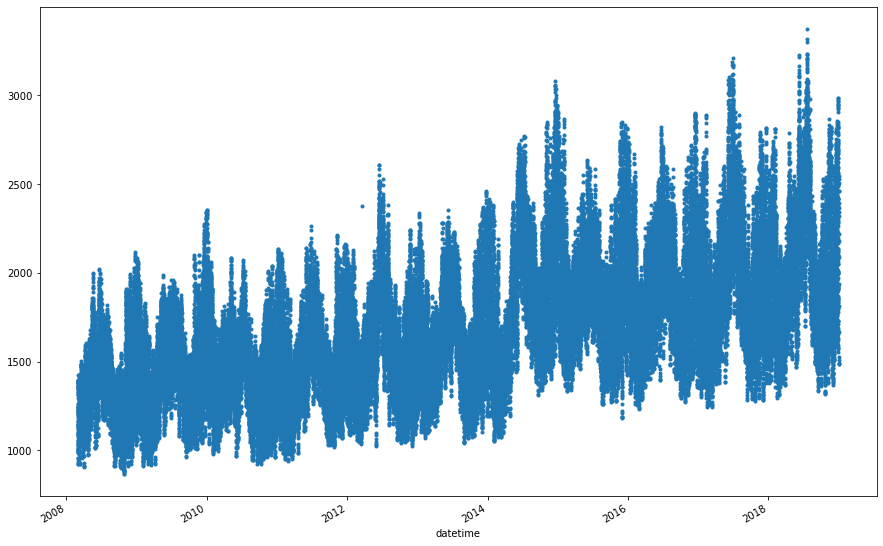

In [98]:
plt.figure(figsize=(15,10))
train.energy.plot(style='.')

In [100]:
train_set=train[(train.index<='28-02-2018')]
valid_set=train[(train.index>'28-02-2018')]

In [101]:
#train_set

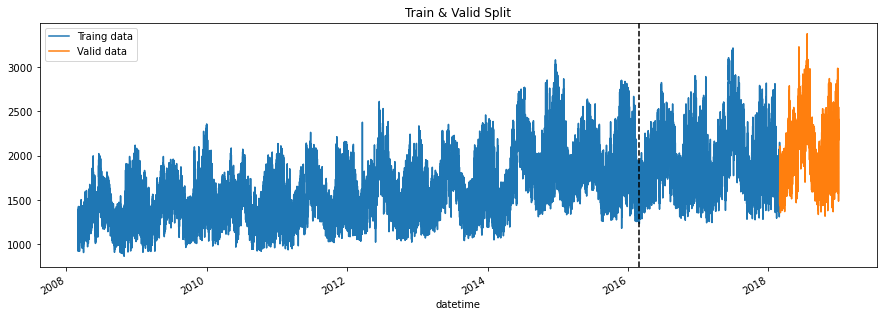

In [102]:
fig,ax=plt.subplots(figsize=(15,5))
train_set['energy'].plot(ax=ax,label='Traing data',title='Train & Valid Split')
valid_set['energy'].plot(ax=ax,label='Valid data')
ax.axvline('29-02-2016',color='black',ls='--')
ax.legend()
plt.show()

In [103]:
import xgboost as xgb

In [104]:
from sklearn.metrics import r2_score, mean_squared_error

In [105]:
xtrain=train_set.drop(['energy'],axis=1)
ytrain=train_set.energy

xtest=valid_set.drop(['energy'],axis=1)
ytest=valid_set.energy

In [106]:
reg_model=xgb.XGBRegressor(n_estimators=1000,
                        early_stopping_rounds=50)
reg_model.fit(xtrain,ytrain,
             eval_set=[(xtrain,ytrain),(xtest,ytest)],verbose=10)

[0]	validation_0-rmse:1205.41889	validation_1-rmse:1509.20181
[10]	validation_0-rmse:133.78844	validation_1-rmse:278.68489
[20]	validation_0-rmse:109.54126	validation_1-rmse:234.78908
[30]	validation_0-rmse:97.70972	validation_1-rmse:249.65595
[40]	validation_0-rmse:88.69702	validation_1-rmse:252.07119
[50]	validation_0-rmse:83.91845	validation_1-rmse:245.13393
[60]	validation_0-rmse:77.74121	validation_1-rmse:246.25100
[68]	validation_0-rmse:74.83765	validation_1-rmse:248.66948


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [107]:
ypred=reg_model.predict(xtest)

In [108]:
r2_score(ytest,ypred)

0.5670194316316716

In [109]:
mean_squared_error(ytest,ypred)

53792.9394325132

In [110]:
predicted_data=pd.DataFrame(ypred,index=ytest.index) 

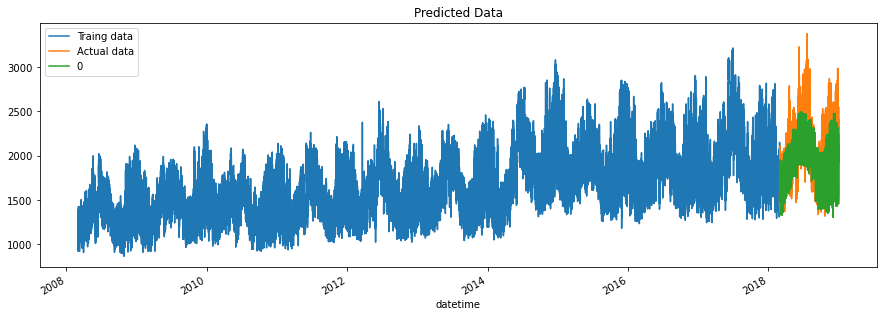

In [111]:
fig,ax=plt.subplots(figsize=(15,5))
ytrain.plot(ax=ax,label='Traing data',title='Predicted Data')
ytest.plot(ax=ax,label='Actual data')
predicted_data.plot(ax=ax,label='predicted data')
#ax.axvline('09-01-2020',color='black',ls='--')
ax.legend()
plt.show()

In [112]:
#Actual data
xtrain=train.drop(['energy'],axis=1)
ytrain=train.energy

xtest=test
#ytest=valid_set.energy

In [113]:
Actual_pred=reg_model.predict(xtest)

In [117]:
Actual_pred

array([1752.2081, 1676.3973, 1604.2566, ..., 2151.2896, 2151.2896,
       2064.873 ], dtype=float32)

In [118]:
xtest['energy']=Actual_pred

In [120]:
base_model=xtest[['row_id','energy']]

In [121]:
base_model.to_csv('base_model',index=False)